### Preprocessing Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv('/content/drive/MyDrive/IPD/code/audio/wav2vecAndFeatureAndLabel.csv', index_col='Unnamed: 0')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,772,773,774,775,776,777,778,779,780,label
0,-0.041823,0.002920,-0.044766,-0.057243,0.101603,-0.048774,0.040614,-0.040836,0.059322,-0.216457,...,0.257575,0.187818,0.088702,0.060642,8825.233502,1323.673214,1.441300,-62.506859,98.441387,1.0
1,0.010185,-0.005375,-0.072192,-0.063968,0.116239,-0.105872,0.034761,-0.033816,0.098582,-0.233236,...,0.138716,0.139052,0.068526,0.042545,6412.378772,2409.543056,0.810636,-36.677607,88.585121,1.0
2,0.009155,-0.010324,-0.122451,-0.074097,0.062079,-0.086227,0.039490,-0.034247,0.107387,-0.223692,...,0.072548,0.074697,0.037494,0.026806,3655.643439,2759.555598,0.971251,-61.680579,97.244589,1.0
3,-0.011689,-0.053456,-0.128466,-0.106791,0.116320,-0.030688,-0.011577,-0.031152,0.161718,-0.101874,...,0.166019,0.177654,0.066600,0.068555,5721.109480,3701.307650,1.893939,-107.198889,106.638173,1.0
4,-0.008956,-0.002147,-0.127113,-0.131215,0.116599,-0.099973,0.010518,-0.026963,0.098702,-0.129256,...,0.117746,0.140863,0.076510,0.058947,4075.818650,3445.456428,2.245509,-77.738639,107.043610,1.0


In [ ]:
X = df.drop(columns=["label"])
y = df["label"]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Try 1

In [ ]:
model = Sequential()

model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.5537 - loss: 0.8228 - val_accuracy: 0.6625 - val_loss: 0.6652
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6890 - loss: 0.6116 - val_accuracy: 0.6650 - val_loss: 0.6493
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7052 - loss: 0.5978 - val_accuracy: 0.6550 - val_loss: 0.6903
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7154 - loss: 0.5574 - val_accuracy: 0.6175 - val_loss: 0.6769
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7015 - loss: 0.5691 - val_accuracy: 0.6600 - val_loss: 0.6682
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7255 - loss: 0.5398 - val_accuracy: 0.6675 - val_loss: 0.7232
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7564 - loss: 0.5220 - val_accuracy: 0.6225 - val_loss: 0.7553


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6443 - loss: 0.6700
Test Accuracy: 0.6650


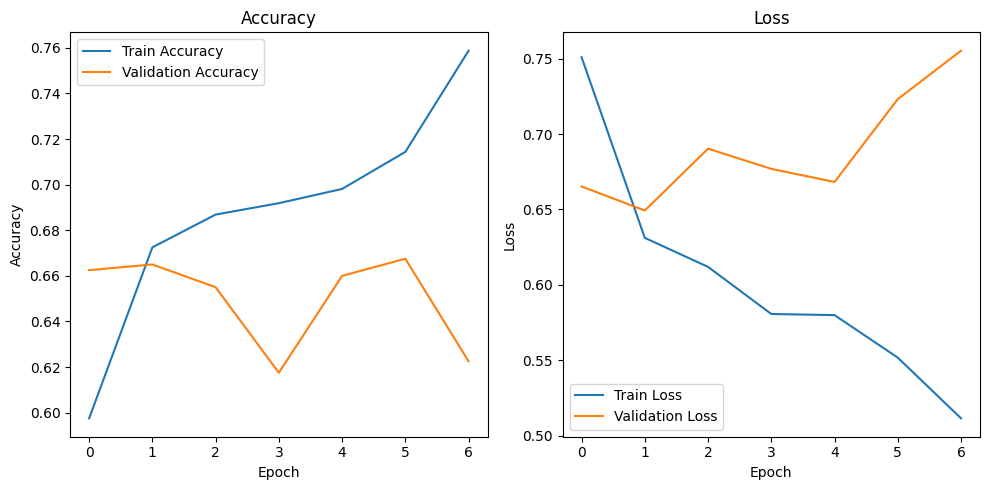

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Try 2

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6835 - loss: 0.6086 - val_accuracy: 0.6625 - val_loss: 0.6693 - learning_rate: 0.0010
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7121 - loss: 0.5801 - val_accuracy: 0.6450 - val_loss: 0.6563 - learning_rate: 0.0010
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6957 - loss: 0.5769 - val_accuracy: 0.6450 - val_loss: 0.6818 - learning_rate: 0.0010
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7392 - loss: 0.5423 - val_accuracy: 0.6425 - val_loss: 0.7049 - learning_rate: 0.0010
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7516 - loss: 0.5195 - val_accuracy: 0.5975 - val_loss: 0.7437 - learning_rate: 0.0010


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6520 - loss: 0.6915
Test Accuracy: 0.6625


### Try 3

In [ ]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6126 - loss: 11.3187 - val_accuracy: 0.6000 - val_loss: 8.8969
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6068 - loss: 8.1880 - val_accuracy: 0.6625 - val_loss: 6.1687
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6687 - loss: 5.5898 - val_accuracy: 0.6625 - val_loss: 4.1527
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6714 - loss: 3.7691 - val_accuracy: 0.6625 - val_loss: 2.8519
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6771 - loss: 2.5776 - val_accuracy: 0.6625 - val_loss: 2.0428
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.6526 - loss: 1.8704 - val_accuracy: 0.6625 - val_loss: 1.5900
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6920 - loss: 1.4114 - val_accuracy: 0.6700 - val_loss: 1.2673
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6798 - loss: 1.1490 - val_accuracy: 0.6600 - 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6454 - loss: 0.7718 
Test Accuracy: 0.6500


### Try 4

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()

model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9758 - loss: 0.0632 - val_accuracy: 0.6075 - val_loss: 2.0129
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9765 - loss: 0.0629 - val_accuracy: 0.5925 - val_loss: 2.0466
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9745 - loss: 0.0605 - val_accuracy: 0.5975 - val_loss: 2.1805
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9691 - loss: 0.0768 - val_accuracy: 0.5725 - val_loss: 2.2168
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9777 - loss: 0.0568 - val_accuracy: 0.5950 - val_loss: 2.2189


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6174 - loss: 1.9455
Test Accuracy: 0.6075


### Try 5

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.callbacks import EarlyStopping

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, optimizer='adam', dropout_rate=0.3, batch_size=32, epochs=50):
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(256, activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='sigmoid'))

        if self.optimizer == 'adam':
            opt = Adam()
        elif self.optimizer == 'rmsprop':
            opt = RMSprop()
        elif self.optimizer == 'nadam':
            opt = Nadam()
        else:
            opt = Adam()

        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        self.model.fit(
            X, y,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=0
        )
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int)

    def score(self, X, y):
        accuracy = self.model.evaluate(X, y, verbose=0)[1]
        return accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'optimizer': ['adam', 'rmsprop', 'nadam'],
    'dropout_rate': [0.3, 0.4, 0.5],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100]
}

In [ ]:
keras_clf = KerasClassifierWrapper()

In [ ]:
random_search = RandomizedSearchCV(
    estimator=keras_clf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1
)

In [ ]:
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RandomizedSearchCV(cv=3, estimator=KerasClassifierWrapper(), n_jobs=-1,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'dropout_rate': [0.3, 0.4, 0.5],
                                        'epochs': [50, 100],
                                        'optimizer': ['adam', 'rmsprop',
                                                      'nadam']},
                   verbose=1)

In [ ]:
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'optimizer': 'adam', 'epochs': 100, 'dropout_rate': 0.5, 'batch_size': 32}


In [ ]:
best_model = random_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6625


### Try 6

In [ ]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
svc_model = SVC(probability=True, kernel='linear', random_state=42)

In [ ]:
voting_clf_hard = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('svc', svc_model)
], voting='hard')

In [ ]:
voting_clf_soft = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('svc', svc_model)
], voting='soft')

In [ ]:
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('svc', svc_model)
], final_estimator=LogisticRegression(), cv=3)

In [ ]:
models = {
    'Voting (Hard)': voting_clf_hard,
    'Voting (Soft)': voting_clf_soft,
    'Stacking': stacking_clf
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Voting (Hard) Accuracy: 0.6625
Voting (Soft) Accuracy: 0.6650
Stacking Accuracy: 0.6625


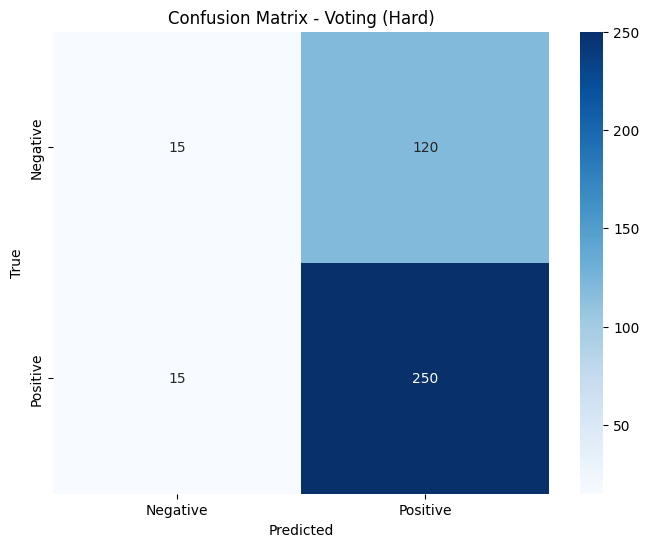

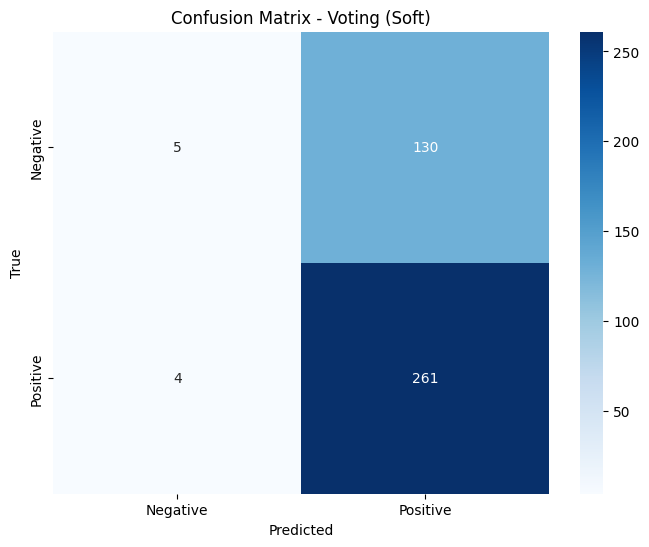

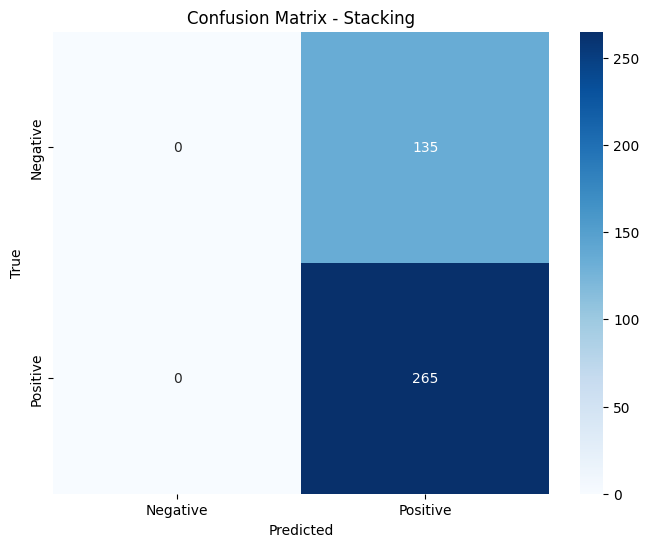

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)

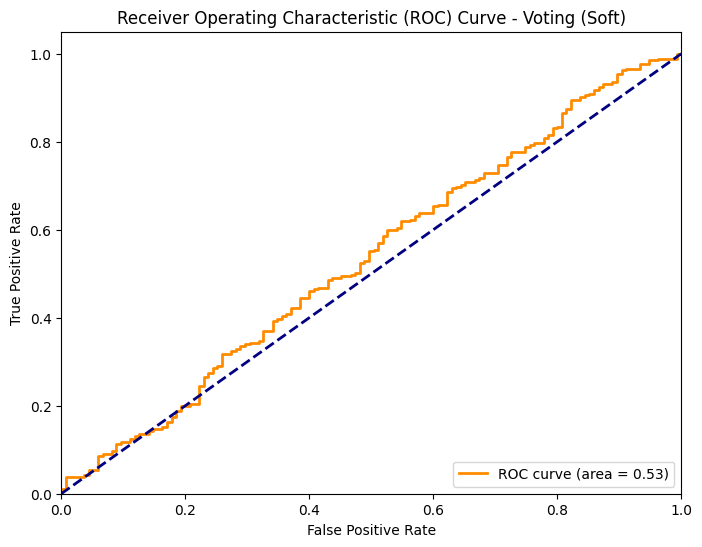

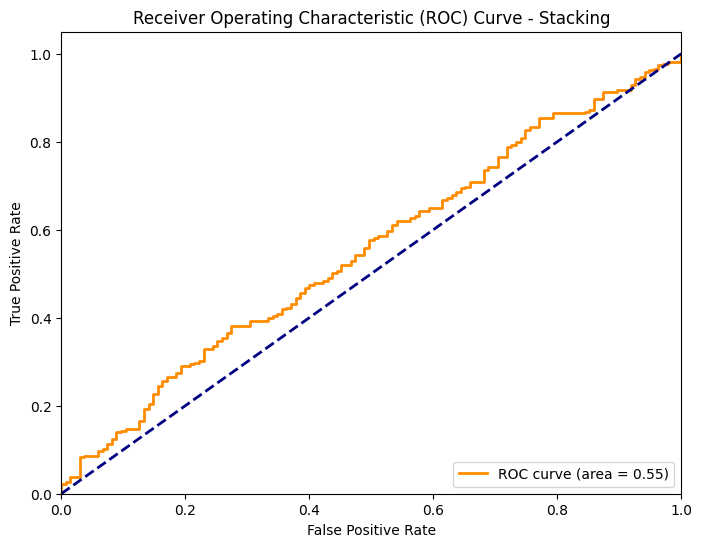

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_pred_proba, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        plot_roc_curve(y_test, y_pred_proba, name)

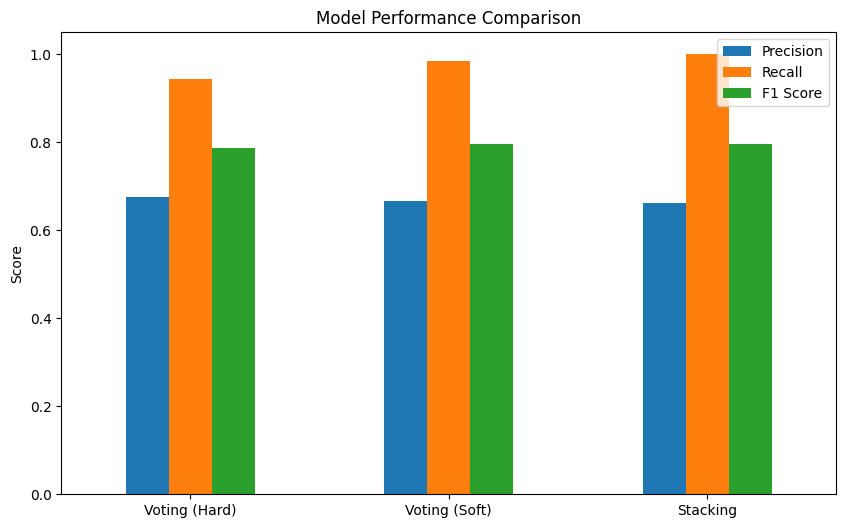

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, f1

metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    precision, recall, f1 = get_metrics(y_test, y_pred)
    metrics[name] = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}

metrics_df = pd.DataFrame(metrics).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()